<a href="https://colab.research.google.com/github/VectorReaves/Crypto-Labs/blob/main/cryptoSets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from sklearn import tree
import os
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
bitcoin_df = "https://raw.githubusercontent.com/VectorReaves/Crypto-Labs/main/Resources/coin_Bitcoin.csv"
cosmos_df = "https://raw.githubusercontent.com/VectorReaves/Crypto-Labs/main/Resources/coin_Cosmos.csv"
doge_df = "https://raw.githubusercontent.com/VectorReaves/Crypto-Labs/main/Resources/coin_Dogecoin.csv"
ethereum_df = "https://raw.githubusercontent.com/VectorReaves/Crypto-Labs/main/Resources/coin_Ethereum.csv"

In [4]:
bitcoin = pd.read_csv(bitcoin_df)
bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


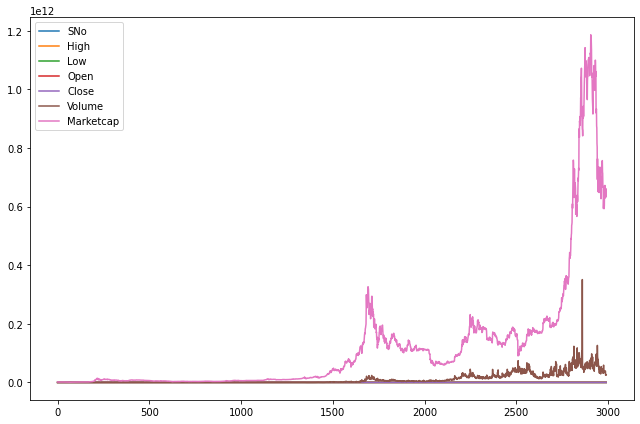

In [5]:
# Set the figure size
plt.rcParams["figure.figsize"] = [9.00, 6.00]
plt.rcParams["figure.autolayout"] = True

# Plot the lines
bitcoin.plot()

plt.show()

In [6]:
# Join dataframes together.
crypto_df = pd.concat(
    map(pd.read_csv, [bitcoin_df, cosmos_df, doge_df, ethereum_df]), ignore_index=True)
crypto_df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
8751,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
8752,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
8753,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
8754,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


In [10]:
model = LinearRegression()

In [11]:
model.fit(X, y)

LinearRegression()

In [14]:
predicted = model.predict(X)
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"{mse}")
print(f"{r2}")

1.1050823263230245e+21
0.9420899979632752


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model.fit(X_train, y_train)

LinearRegression()

In [16]:
print(f"True output: {y[0]}")
print(f"Predicted output: {predicted[0]}")
print(f"Prediction Error: {predicted[0]-y[0]}")

True output: 1603768864.5
Predicted output: 11178932266.332829
Prediction Error: 9575163401.832829


In [17]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [18]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(crypto_df) - window - 1):
        features = crypto_df.iloc[i:(i + window), feature_col_number]
        target = crypto_df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [20]:
window_size = 1

# Column index 1 is the `Close` column
feature_column = 1
target_column = 1
X, y = window_data(crypto_df, window_size, feature_column, target_column)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [22]:
model = Sequential()

number_units = 30
dropout_fraction = 0.2

model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
model.add(Dense(1))

In [24]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [25]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 30)             3840      
                                                                 
 dropout (Dropout)           (None, 1, 30)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 30)             7320      
                                                                 
 dropout_1 (Dropout)         (None, 1, 30)             0         
                                                                 
 lstm_2 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [26]:
model.fit(X_train, y_train, epochs=20, shuffle=False, batch_size=1, verbose=1)

Epoch 1/20
6567/6567 [==============================] - 37s 5ms/step - loss: 21680495239347780452352.0000
Epoch 2/20
6567/6567 [==============================] - 23s 3ms/step - loss: 21680495239347780452352.0000
Epoch 3/20
6567/6567 [==============================] - 23s 4ms/step - loss: 21680495239347780452352.0000
Epoch 4/20
6567/6567 [==============================] - 21s 3ms/step - loss: 21680495239347780452352.0000
Epoch 5/20
6567/6567 [==============================] - 25s 4ms/step - loss: 21680495239347780452352.0000
Epoch 6/20
6567/6567 [==============================] - 24s 4ms/step - loss: 21680495239347780452352.0000
Epoch 7/20
6567/6567 [==============================] - 32s 5ms/step - loss: 21680495239347780452352.0000
Epoch 8/20
6567/6567 [==============================] - 23s 3ms/step - loss: 21680495239347780452352.0000
Epoch 9/20
6567/6567 [==============================] - 22s 3ms/step - loss: 21680495239347780452352.0000
Epoch 10/20
6567/6567 [=======================

In [49]:
predict_df = crypto_df[(crypto_df["Date"] >= '2020-10-01')]
predict_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2712,2713,Bitcoin,BTC,2020-10-01 23:59:59,10933.624309,10472.356518,10795.254743,10619.451908,4.002313e+10,1.965121e+11
2713,2714,Bitcoin,BTC,2020-10-02 23:59:59,10657.837986,10416.689205,10619.821216,10575.975042,4.866145e+10,1.957161e+11
2714,2715,Bitcoin,BTC,2020-10-03 23:59:59,10598.940803,10511.129780,10575.100636,10549.328900,4.466027e+10,1.952332e+11
2715,2716,Bitcoin,BTC,2020-10-04 23:59:59,10686.000098,10534.391837,10550.440671,10669.582543,7.125178e+10,1.974689e+11
2716,2717,Bitcoin,BTC,2020-10-05 23:59:59,10793.507851,10634.600163,10676.528956,10793.339428,4.753758e+10,1.997696e+11


In [50]:
predict_df.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
8751,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
8752,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
8753,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
8754,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11
8755,2160,Ethereum,ETH,2021-07-06 23:59:59,2346.294874,2197.919385,2197.919385,2324.679449,2.089186e+10,2.710286e+11


In [51]:
bitCoinPredictionDays = 90

In [52]:
predict_df['Prediction > 90 Days'] = predict_df[['High']].shift(-bitCoinPredictionDays)
predict_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Prediction > 90 Days
2712,2713,Bitcoin,BTC,2020-10-01 23:59:59,10933.624309,10472.356518,10795.254743,10619.451908,4.002313e+10,1.965121e+11,28937.740004
2713,2714,Bitcoin,BTC,2020-10-02 23:59:59,10657.837986,10416.689205,10619.821216,10575.975042,4.866145e+10,1.957161e+11,29244.876688
2714,2715,Bitcoin,BTC,2020-10-03 23:59:59,10598.940803,10511.129780,10575.100636,10549.328900,4.466027e+10,1.952332e+11,29600.626950
2715,2716,Bitcoin,BTC,2020-10-04 23:59:59,10686.000098,10534.391837,10550.440671,10669.582543,7.125178e+10,1.974689e+11,33155.118819
2716,2717,Bitcoin,BTC,2020-10-05 23:59:59,10793.507851,10634.600163,10676.528956,10793.339428,4.753758e+10,1.997696e+11,34608.556738


In [53]:
# Predict the high volume of crpytos for one months worth of time.
x = np.array(predict_df.drop(['Prediction > 90 Days'],1))

# Remove last n
x = x[:len(predict_df)-bitCoinPredictionDays]
print(x)

[[2713 'Bitcoin' 'BTC' ... 10619.45190766 40023134099.56767
  196512086756.2781]
 [2714 'Bitcoin' 'BTC' ... 10575.97504191 48661453917.9649
  195716085732.39612]
 [2715 'Bitcoin' 'BTC' ... 10549.32889962 44660271563.31908
  195233191301.2567]
 ...
 [2068 'Ethereum' 'ETH' ... 2107.88709669 28889391170.41 243143128759.79]
 [2069 'Ethereum' 'ETH' ... 2118.37895913 29222865881.1 244382061190.03]
 [2070 'Ethereum' 'ETH' ... 1971.07725542 36116271935.34 227414944866.5]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [54]:
# Let's create a new dataset for the prediction.
y = np.array(predict_df['Prediction > 90 Days'])

# Get all the values except last 'n' rows
y = y[:-bitCoinPredictionDays]
print(y)

[28937.74000401 29244.87668786 29600.6269503  ...  2384.28685703
  2321.92283563  2346.29487431]


In [55]:
# Import libs, and Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2)

In [56]:
# Set the predictionDays array equal to last 30 rows from the original data set
bitCoinPredictionDays_array = np.array(predict_df.drop(['Prediction > 90 Days'],1))[-bitCoinPredictionDays:]

print(bitCoinPredictionDays_array)

[[2071 'Ethereum' 'ETH' '2021-04-08 23:59:59' 2091.51639226 1959.07947518
  1969.13320855 2088.57365088 25312956528.95 241000078757.85]
 [2072 'Ethereum' 'ETH' '2021-04-09 23:59:59' 2102.87373189 2055.16335741
  2088.77229912 2072.10887563 19812472091.89 239127946688.06]
 [2073 'Ethereum' 'ETH' '2021-04-10 23:59:59' 2196.99625318 2062.78751585
  2071.11156011 2135.9422007 24986243611.44 246523420884.8]
 [2074 'Ethereum' 'ETH' '2021-04-11 23:59:59' 2165.19150015 2119.8656727
  2136.15698332 2157.65703708 19692836132.1 249059103191.91]
 [2075 'Ethereum' 'ETH' '2021-04-12 23:59:59' 2199.71867311 2110.36896826
  2157.36172782 2139.35319598 21727936609.45 246975320275.94]
 [2076 'Ethereum' 'ETH' '2021-04-13 23:59:59' 2318.42323937 2138.55951609
  2139.36422943 2299.18778599 29456642939.44 265458239569.45]
 [2077 'Ethereum' 'ETH' '2021-04-14 23:59:59' 2449.68761012 2284.56378
  2299.34785556 2435.10501889 35592822986.38 281183637540.49]
 [2078 'Ethereum' 'ETH' '2021-04-15 23:59:59' 2544.2673

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
